# Análisis Explotario de Datos
- Dataset: Predict Students' Dropout and Academic Success
- Fuente: UCI Repository
- Autor:  Maria Vielma
- Fecha: Enero 2026

In [165]:
import sys
# Obtener ruta absoluta al proyecto (un nivel arriba de notebooks/)
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Agregar al path
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

In [166]:
import os
from src.data.clean_columns import clean_dataframe_columns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ruta absoluta al proyecto
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Agregar al path si no está
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

## 1. Carga y Dimensión del dataset
Este paso permite conocer cuántas observaciones y variables contiene el dataset.

In [167]:
# Cargar el dataset
df = pd.read_csv('../data/raw/data.csv', delimiter=';')
df = clean_dataframe_columns(df)

# Verifica carga
print("================================================================================")
print("1. CARGA Y DIMENSIÓN DEL DATASET")
print("================================================================================")
print(f"\n Dataset cargado")
print(f" - Observaciones (filas): {df.shape[0]:,}")
print(f" - Variables (columnas): {df.shape[1]}" + ", incluye columna Target")
print(f" - Total de celdas: {df.shape[0] * df.shape[1]:,}")

# Primeras filas
print("\n" + "--------------------------------------------------------------------------------")
print("Primeras 5 filas del dataset:")
print("--------------------------------------------------------------------------------")
df.head()

1. CARGA Y DIMENSIÓN DEL DATASET

 Dataset cargado
 - Observaciones (filas): 4,424
 - Variables (columnas): 37, incluye columna Target
 - Total de celdas: 163,688

--------------------------------------------------------------------------------
Primeras 5 filas del dataset:
--------------------------------------------------------------------------------


,marital_status,application_mode,application_order,course,daytimeevening_attendance,previous_qualification,previous_qualification_grade,nacionality,mothers_qualification,fathers_qualification,...,curricular_units_2nd_sem_credited,curricular_units_2nd_sem_enrolled,curricular_units_2nd_sem_evaluations,curricular_units_2nd_sem_approved,curricular_units_2nd_sem_grade,curricular_units_2nd_sem_without_evaluations,unemployment_rate,inflation_rate,gdp,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## 2. Listado de variables del dataset, verificación de nulos y duplicados
Este paso permite conocer cuántas observaciones y variables contiene el dataset.

In [168]:
print("================================================================================")
print("2. LISTADO DE VARIABLES DEL DATASET, VERIFICACION DE NULOS Y DUPLICADOS")
print("================================================================================")

# Lista las variables
print(f"\n{'#':<4} {'Variable':<55} {'Tipo':<10}")
print("--------------------------------------------------------------------------------")
for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    print(f"{i:<4} {col:<55} {str(dtype):<10}")

# Verificar valores nulos
print("\n" + "--------------------------------------------------------------------------------")
print(" Verificación de Valores Nulos:")
print("--------------------------------------------------------------------------------")
null_counts = df.isnull().sum()
total_nulls = null_counts.sum()

if total_nulls == 0:
    print(" No hay valores nulos en el dataset")
else:
    print(f" Total de valores nulos: {total_nulls}")
    print(null_counts[null_counts > 0])

# Verificar Duplicados
print("\n" + "--------------------------------------------------------------------------------")
print(" Verificación de Valores duplicados:")
print("--------------------------------------------------------------------------------")
duplicates = df.duplicated().sum()
if duplicates == 0:
    print(" No hay registros duplicados")
else:
    print(f" Registros duplicados: {duplicates}")
    

2. LISTADO DE VARIABLES DEL DATASET, VERIFICACION DE NULOS Y DUPLICADOS

#    Variable                                                Tipo      
--------------------------------------------------------------------------------
1    marital_status                                          int64     
2    application_mode                                        int64     
3    application_order                                       int64     
4    course                                                  int64     
5    daytimeevening_attendance                               int64     
6    previous_qualification                                  int64     
7    previous_qualification_grade                            float64   
8    nacionality                                             int64     
9    mothers_qualification                                   int64     
10   fathers_qualification                                   int64     
11   mothers_occupation                               

## 3. Análisis de variables
Se evalúa las variables por grupo de acuerdo al tipo numéricas, categóricas (nominales y ordinales)

### 3.0. Clasificación de variables por tipo

In [169]:
print("================================================================================")
print("3.0. CLASIFICACIÓN DE VARIABLES POR TIPO")
print("================================================================================")

# =============================================================================
# DEFINICIÓN MANUAL BASADA EN EL CONOCIMIENTO DEL DOMINIO
# =============================================================================

# 1. VARIABLES NUMÉRICAS DISCRETAS
VARS_NUMERICAS= [
    'age_at_enrollment',                              
    'curricular_units_1st_sem_credited',            
    'curricular_units_1st_sem_enrolled',            
    'curricular_units_1st_sem_evaluations',         
    'curricular_units_1st_sem_approved',            
    'curricular_units_1st_sem_grade', 
    'curricular_units_1st_sem_without_evaluations', 
    'curricular_units_2nd_sem_credited',            
    'curricular_units_2nd_sem_enrolled',            
    'curricular_units_2nd_sem_evaluations',         
    'curricular_units_2nd_sem_approved',            
    'curricular_units_2nd_sem_grade',
    'curricular_units_2nd_sem_without_evaluations',
    'Previous qualification (grade)',     
    'admission_grade',                    
    'unemployment_rate',                  
    'inflation_rate',                     
    'gdp'     
]


# 2. VARIABLES BINARIAS (0/1)
VARS_BINARIAS = [
    'daytimeevening_attendance',   # 0=Nocturno, 1=Diurno
    'displaced',                   # 0=No, 1=Si
    'educational_special_needs',   # 0=No, 1=Si
    'debtor',                      # 0=No, 1=Si
    'tuition_fees_up_to_date',     # 0=No, 1=Si
    'gender',                      # 0=Femenino, 1=Masculino
    'scholarship_holder',         # 0=No, 1=Si
    'international'                # 0=No, 1=Si
]

# 3. VARIABLES CATEGÓRICAS NOMINALES (sin orden inherente)
VARS_CATEGORICAS_NOMINALES = [
    'marital_status',              
    'application_mode',            
    'course',                      
    'previous_qualification',      
    'nacionality',                 
    "mothers_qualification",       
    "fathers_qualification",       
    "mothers_occupation",          
    "fathers_occupation"           
]

# 4. VARIABLES ORDINALES (tienen orden significativo)
VARS_CATEGORICAS_ORDINALES = [
    'application_order'            
]

# 5. VARIABLES NUMÉRICAS DISCRETAS
VARS_NUMERICAS= [
    'age_at_enrollment',                              
    'curricular_units_1st_sem_credited',            
    'curricular_units_1st_sem_enrolled',            
    'curricular_units_1st_sem_evaluations',         
    'curricular_units_1st_sem_approved',            
    'curricular_units_1st_sem_grade', 
    'curricular_units_1st_sem_without_evaluations', 
    'curricular_units_2nd_sem_credited',            
    'curricular_units_2nd_sem_enrolled',            
    'curricular_units_2nd_sem_evaluations',         
    'curricular_units_2nd_sem_approved',            
    'curricular_units_2nd_sem_grade',
    'curricular_units_2nd_sem_without_evaluations',
    'previous_qualification_grade',     
    'admission_grade',                    
    'unemployment_rate',                  
    'inflation_rate',                     
    'gdp'     
]

# 6. VARIABLE OBJETIVO
TARGET = ['target']  # Categórica: Dropout, Graduate, Enrolled


# =============================================================================
# CONTEO VARIABLES
# =============================================================================
total_classified = (len(VARS_BINARIAS) + len(VARS_CATEGORICAS_NOMINALES) + 
                    len(VARS_CATEGORICAS_ORDINALES) + len(VARS_NUMERICAS) + 
                    len(TARGET))

# =============================================================================
# MOSTRAR CLASIFICACIÓN
# =============================================================================

print(f"\n CANTIDAD DE VARIABLES NUMÉRICAS: {len(VARS_NUMERICAS)} variables")

print(f"\n CANTIDAD DE VARIABLES CATEGÓRICAS BINARIAS: {len(VARS_BINARIAS)} variables")

print(f"\n CANTIDAD DE VARIABLES CATEGÓRICAS NOMINALES: {len(VARS_CATEGORICAS_NOMINALES)} variables")

print(f"\n CANTIDAD DE VARIABLES CATEGÓRICAS ORDINALES: {len(VARS_CATEGORICAS_ORDINALES)} variable")

print(f"\n TARGET: {len(TARGET)} variable (Clases: Dropout, Graduate, Enrolled)")

print(f"\n TOTAL VARIABLES CLASIFICADAS: {total_classified}")

# =============================================================================
# GUARDAR CLASIFICACIÓN
# =============================================================================
VARIABLE_TYPES = {
    'numeric': VARS_NUMERICAS,
    'binary': VARS_BINARIAS,
    'categorical_nominal': VARS_CATEGORICAS_NOMINALES,
    'ordinal': VARS_CATEGORICAS_ORDINALES,
    'target': TARGET
}


3.0. CLASIFICACIÓN DE VARIABLES POR TIPO

 CANTIDAD DE VARIABLES NUMÉRICAS: 18 variables

 CANTIDAD DE VARIABLES CATEGÓRICAS BINARIAS: 8 variables

 CANTIDAD DE VARIABLES CATEGÓRICAS NOMINALES: 9 variables

 CANTIDAD DE VARIABLES CATEGÓRICAS ORDINALES: 1 variable

 TARGET: 1 variable (Clases: Dropout, Graduate, Enrolled)

 TOTAL VARIABLES CLASIFICADAS: 37


### 3.1. Análisis variables numéricas

#### 3.1.1. Análisis UNIVARIADO

Estadisticas 

In [170]:
df[VARS_NUMERICAS].describe().T

,count,mean,std,min,25%,50%,75%,max
age_at_enrollment,4424.0,23.265145,7.587816,17.00,19.00,20.000000,25.000000,70.000000
curricular_units_1st_sem_credited,4424.0,0.709991,2.360507,0.00,0.00,0.000000,0.000000,20.000000
curricular_units_1st_sem_enrolled,4424.0,6.270570,2.480178,0.00,5.00,6.000000,7.000000,26.000000
curricular_units_1st_sem_evaluations,4424.0,8.299051,4.179106,0.00,6.00,8.000000,10.000000,45.000000
curricular_units_1st_sem_approved,4424.0,4.706600,3.094238,0.00,3.00,5.000000,6.000000,26.000000
curricular_units_1st_sem_grade,4424.0,10.640822,4.843663,0.00,11.00,12.285714,13.400000,18.875000
curricular_units_1st_sem_without_evaluations,4424.0,0.137658,0.690880,0.00,0.00,0.000000,0.000000,12.000000
curricular_units_2nd_sem_credited,4424.0,0.541817,1.918546,0.00,0.00,0.000000,0.000000,19.000000
curricular_units_2nd_sem_enrolled,4424.0,6.232143,2.195951,0.00,5.00,6.000000,7.000000,23.000000
curricular_units_2nd_sem_evaluations,4424.0,8.063291,3.947951,0.00,6.00,8.000000,10.000000,33.000000


Histogramas

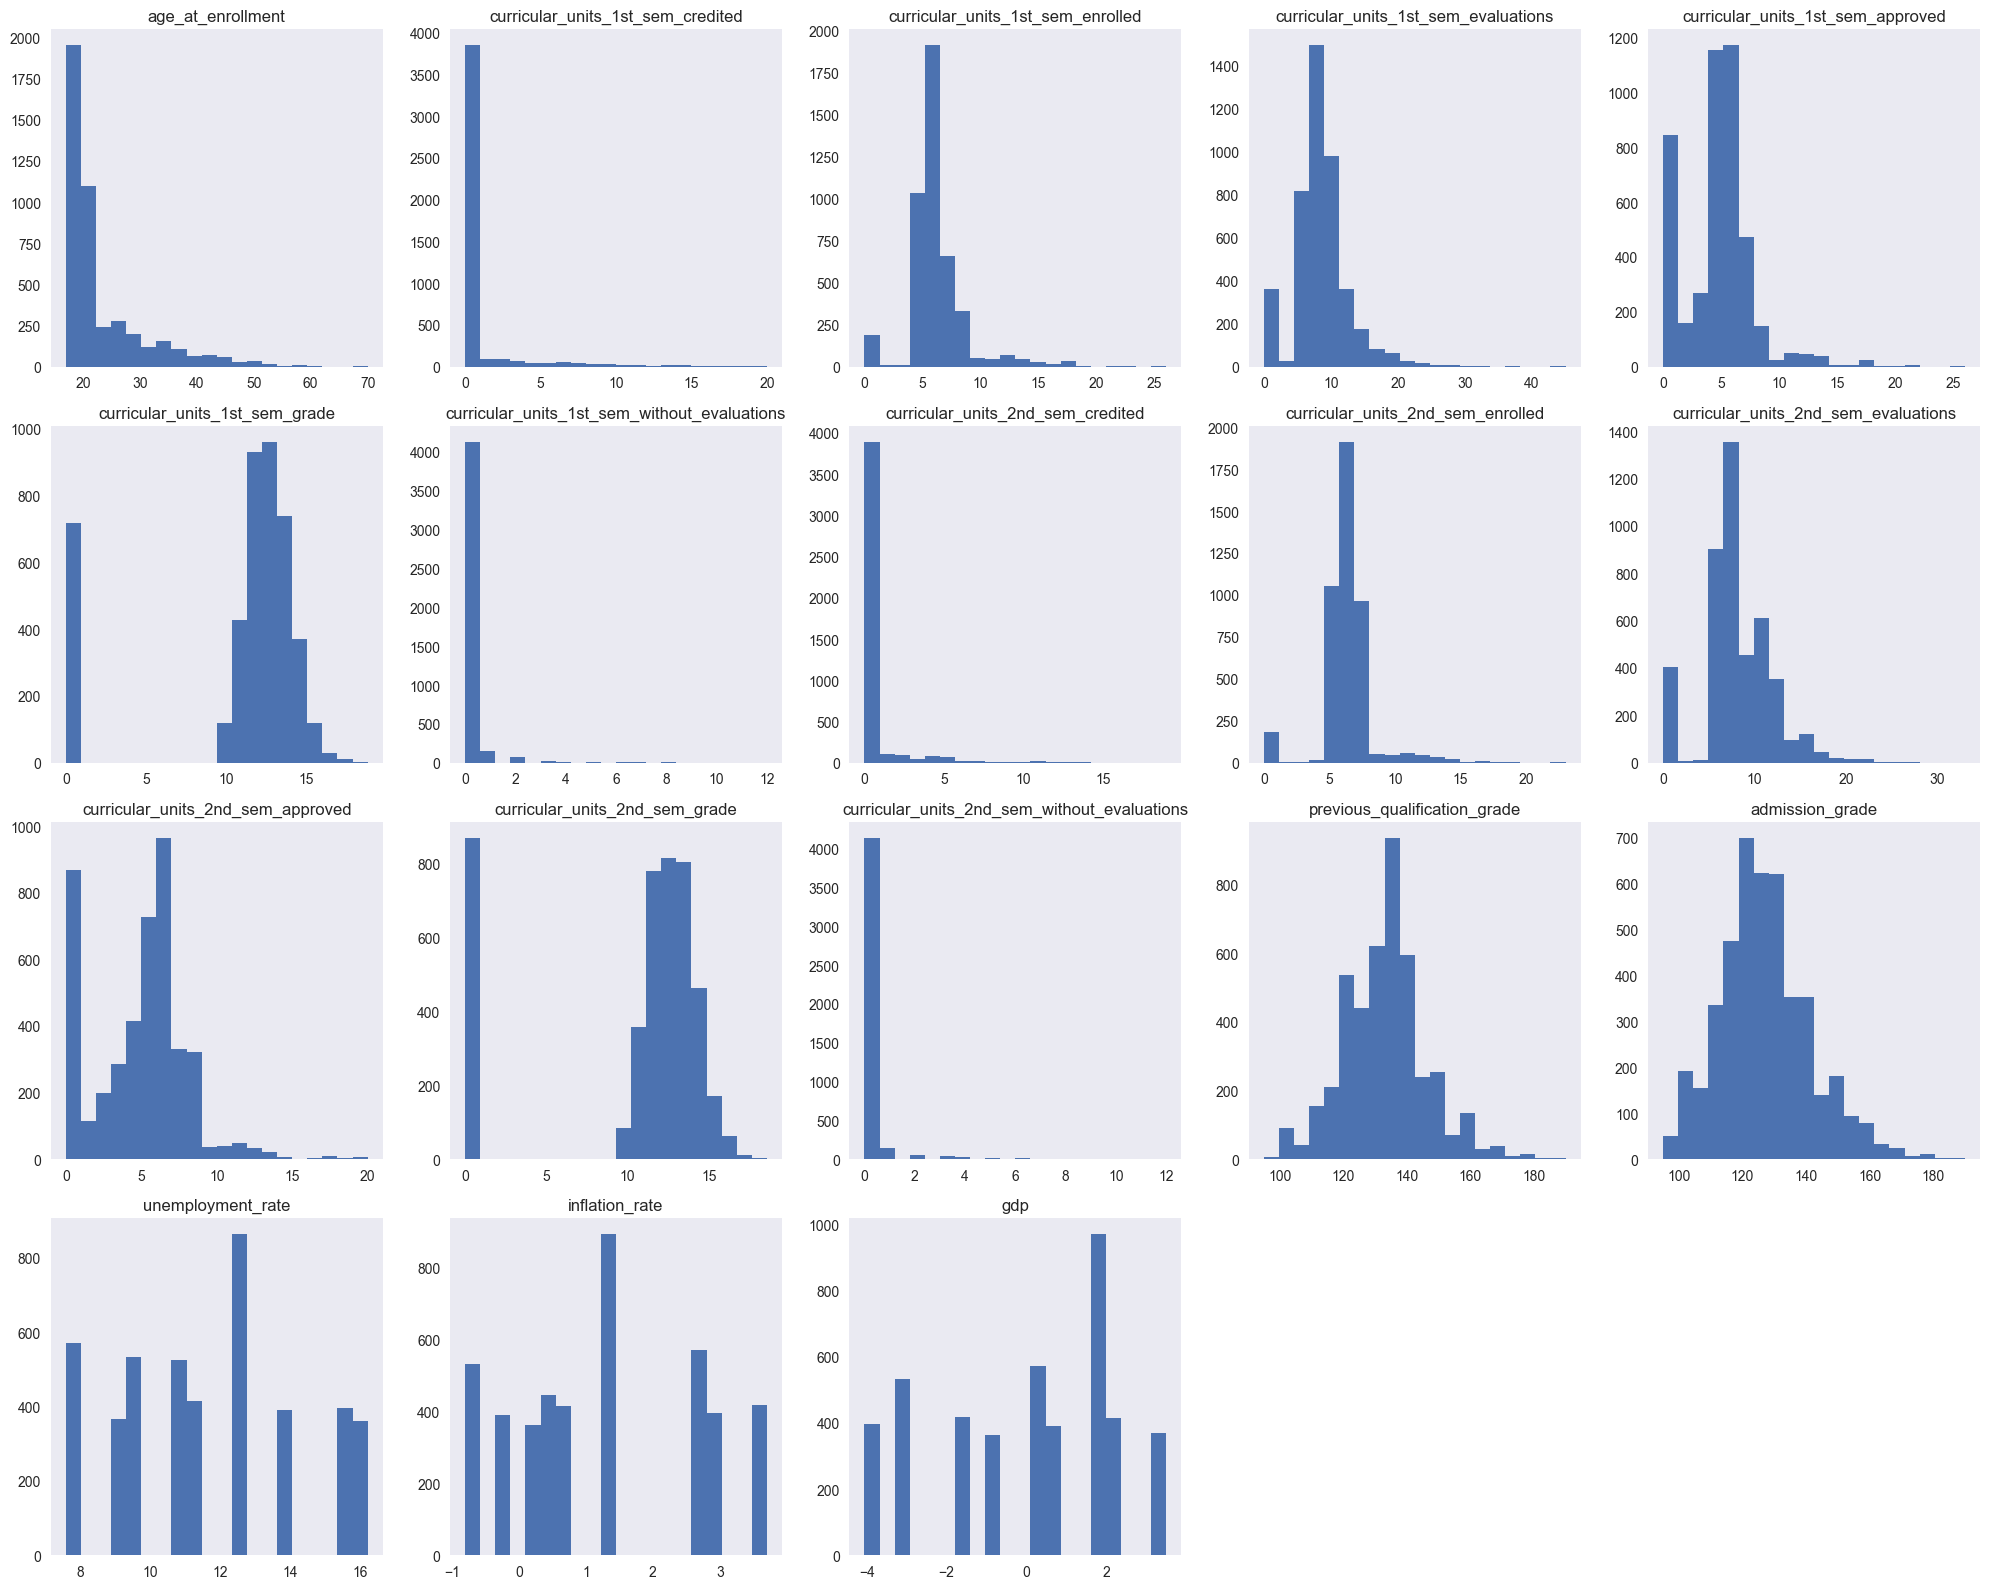

In [171]:
import warnings

# Ajustes globales
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (20, 20)
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
warnings.filterwarnings("ignore", message="Glyph.*missing")

OUTPUT_DIR = "../outputs/figures/EDA/numericas/"
os.makedirs(OUTPUT_DIR, exist_ok=True)
# Nombre archivo 
filename = f"01_distribucion_variables_numericas.png"
filepath = os.path.join(OUTPUT_DIR, filename)

# Calcular número de filas necesarias para 5 columnas
n_vars = len(VARS_NUMERICAS)
n_cols = 5
n_rows = (n_vars // n_cols) + (1 if n_vars % n_cols != 0 else 0)

# Histograma de todas las columnas numéricas con 5 columnas
df[VARS_NUMERICAS].hist(bins=20, figsize=(20, 16), grid=False, layout=(n_rows, n_cols))
plt.tight_layout()
plt.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

Diagramas de cajas

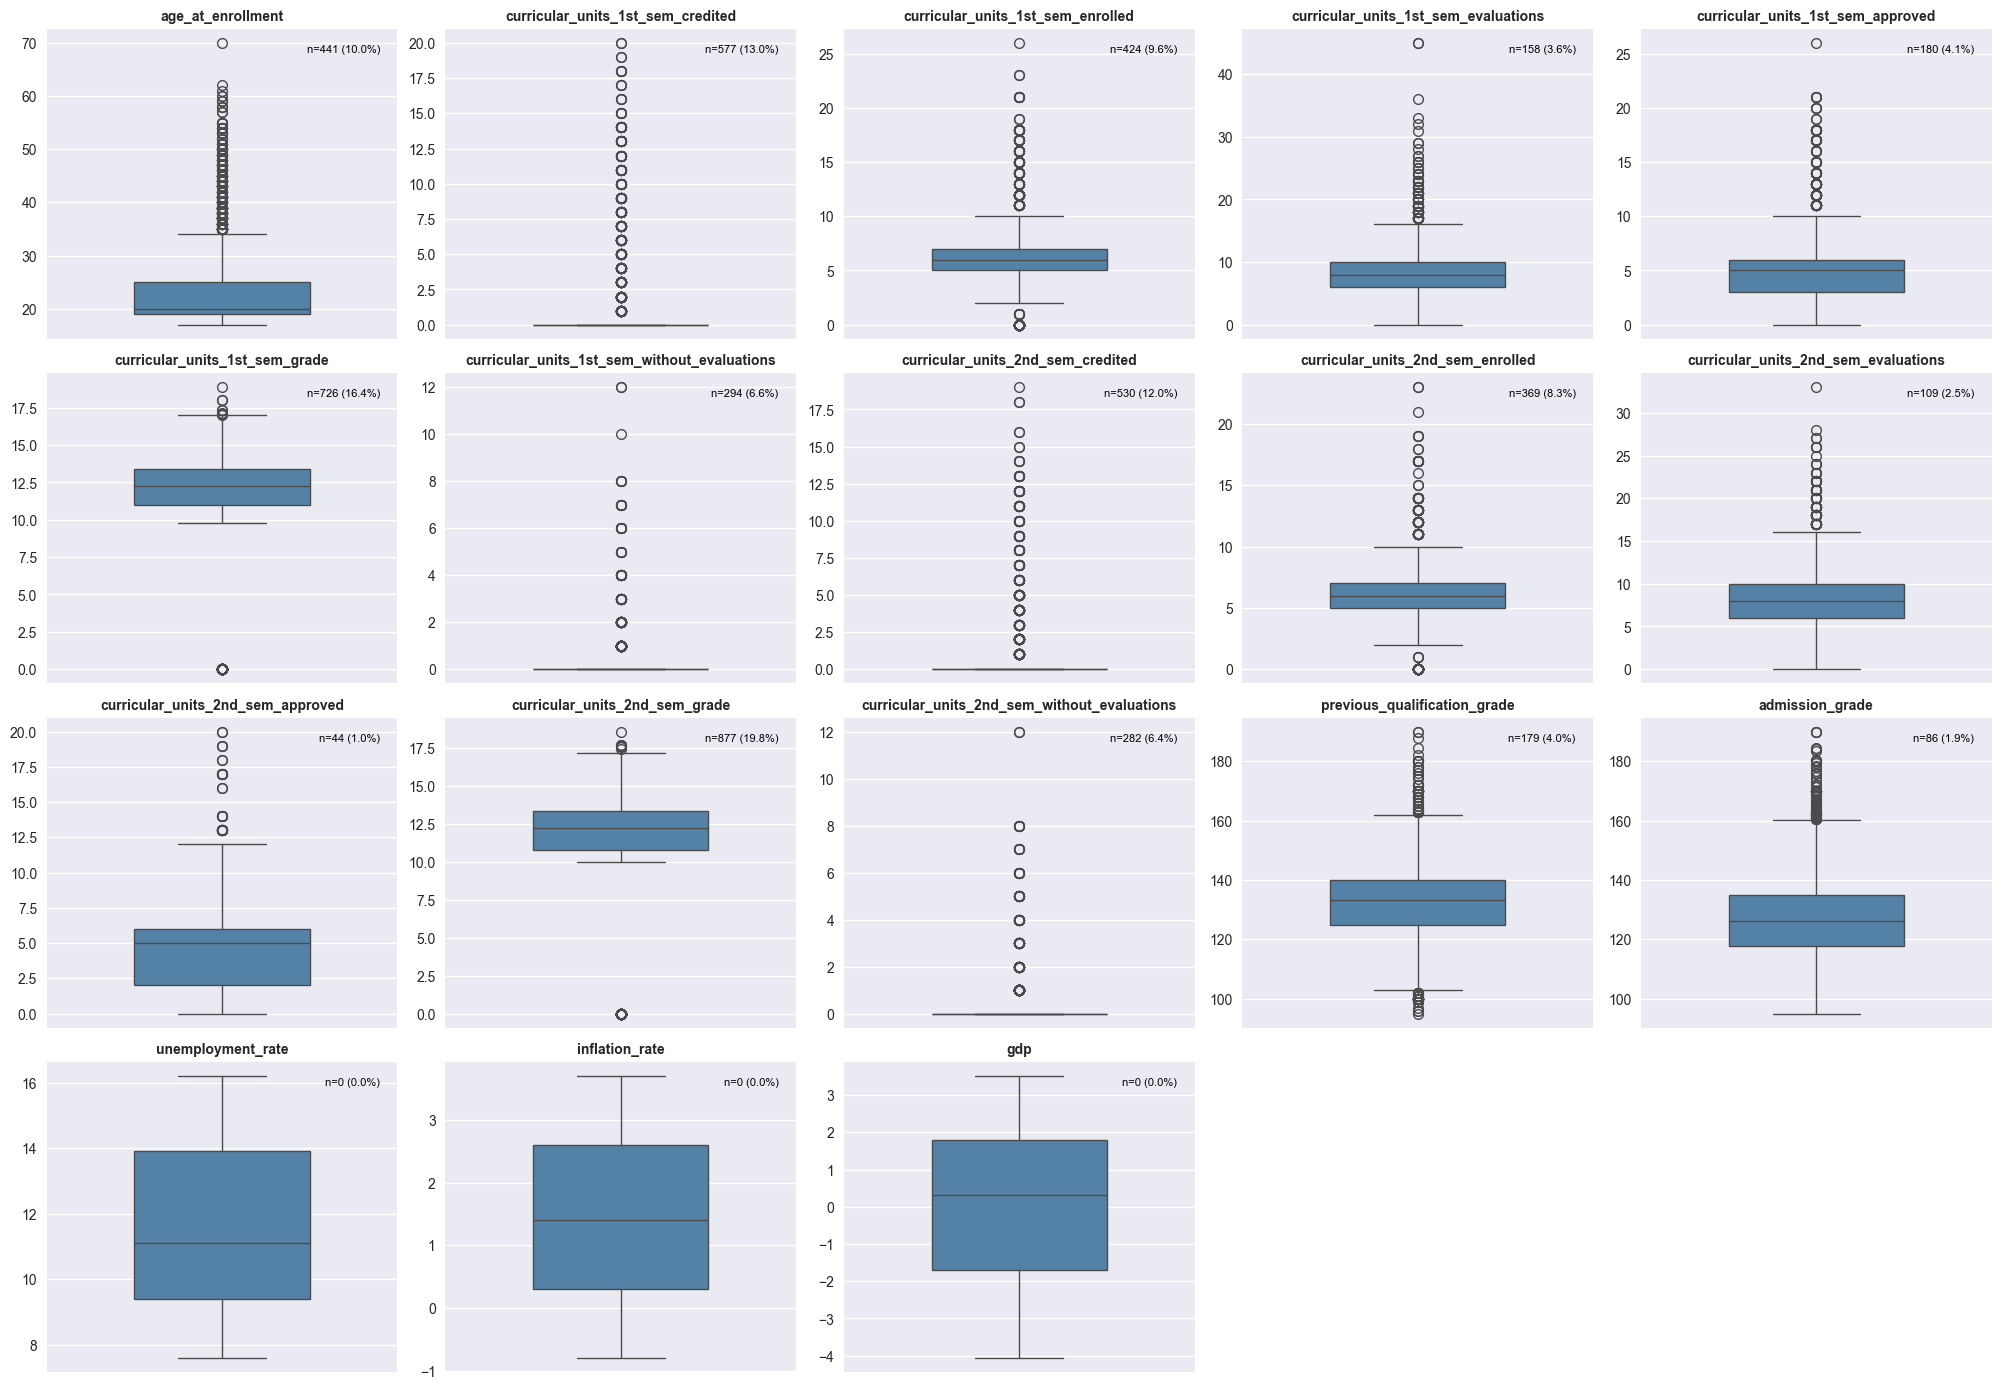

In [172]:
# Boxplots con Seaborn
n_vars = len(VARS_NUMERICAS)
n_cols = 5
n_rows = (n_vars // n_cols) + (1 if n_vars % n_cols != 0 else 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 14))
axes = axes.flatten()

OUTPUT_DIR = "../outputs/figures/EDA/numericas/"
os.makedirs(OUTPUT_DIR, exist_ok=True)
# Nombre archivo 
filename = f"02_boxplot_variables_numericas.png"
filepath = os.path.join(OUTPUT_DIR, filename)

for i, col in enumerate(VARS_NUMERICAS):
    ax = axes[i]
    sns.boxplot(y=df[col], ax=ax, color='steelblue', width=0.5)
    ax.set_title(col, fontsize=10, fontweight='bold')
    ax.set_ylabel('')
    
    # Agregar información de outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    pct = (n_outliers / len(df)) * 100
    
    ax.annotate(f'n={n_outliers} ({pct:.1f}%)', xy=(0.95, 0.95), xycoords='axes fraction',
                ha='right', va='top', fontsize=8, color='black')

# Ocultar subplots vacíos
for j in range(len(VARS_NUMERICAS), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

#### 3.1.2. Análisis BIVARIADO

Matriz de correlación

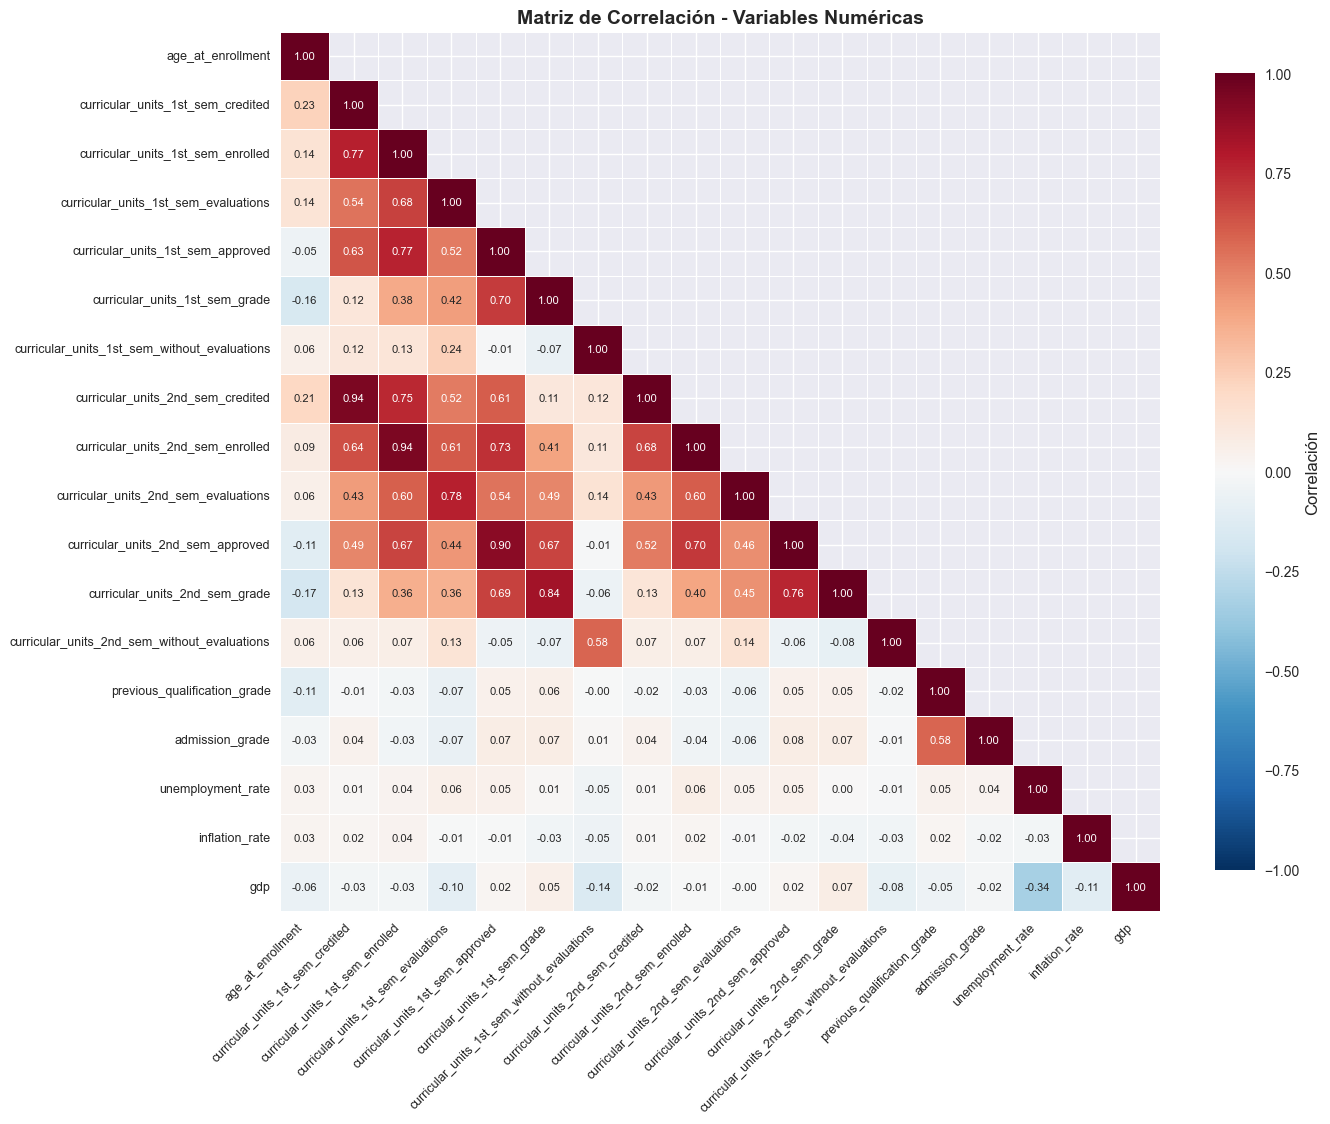

In [173]:
# Calcular matriz de correlación
corr_matrix = df[VARS_NUMERICAS].corr()

# Visualización: Heatmap completo
fig, ax = plt.subplots(figsize=(14, 12))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, vmin=-1, vmax=1, square=True, linewidths=0.5,
            cbar_kws={'shrink': 0.8, 'label': 'Correlación'},
            annot_kws={'size': 8}, ax=ax)

ax.set_title('Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)


OUTPUT_DIR = "../outputs/figures/EDA/numericas/"
os.makedirs(OUTPUT_DIR, exist_ok=True)
# Nombre archivo 
filename = f"03_correlation_matrix_variables_numericas.png"
filepath = os.path.join(OUTPUT_DIR, filename)

plt.tight_layout()
plt.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

Diagramas de caja - Variables numéricas versus target

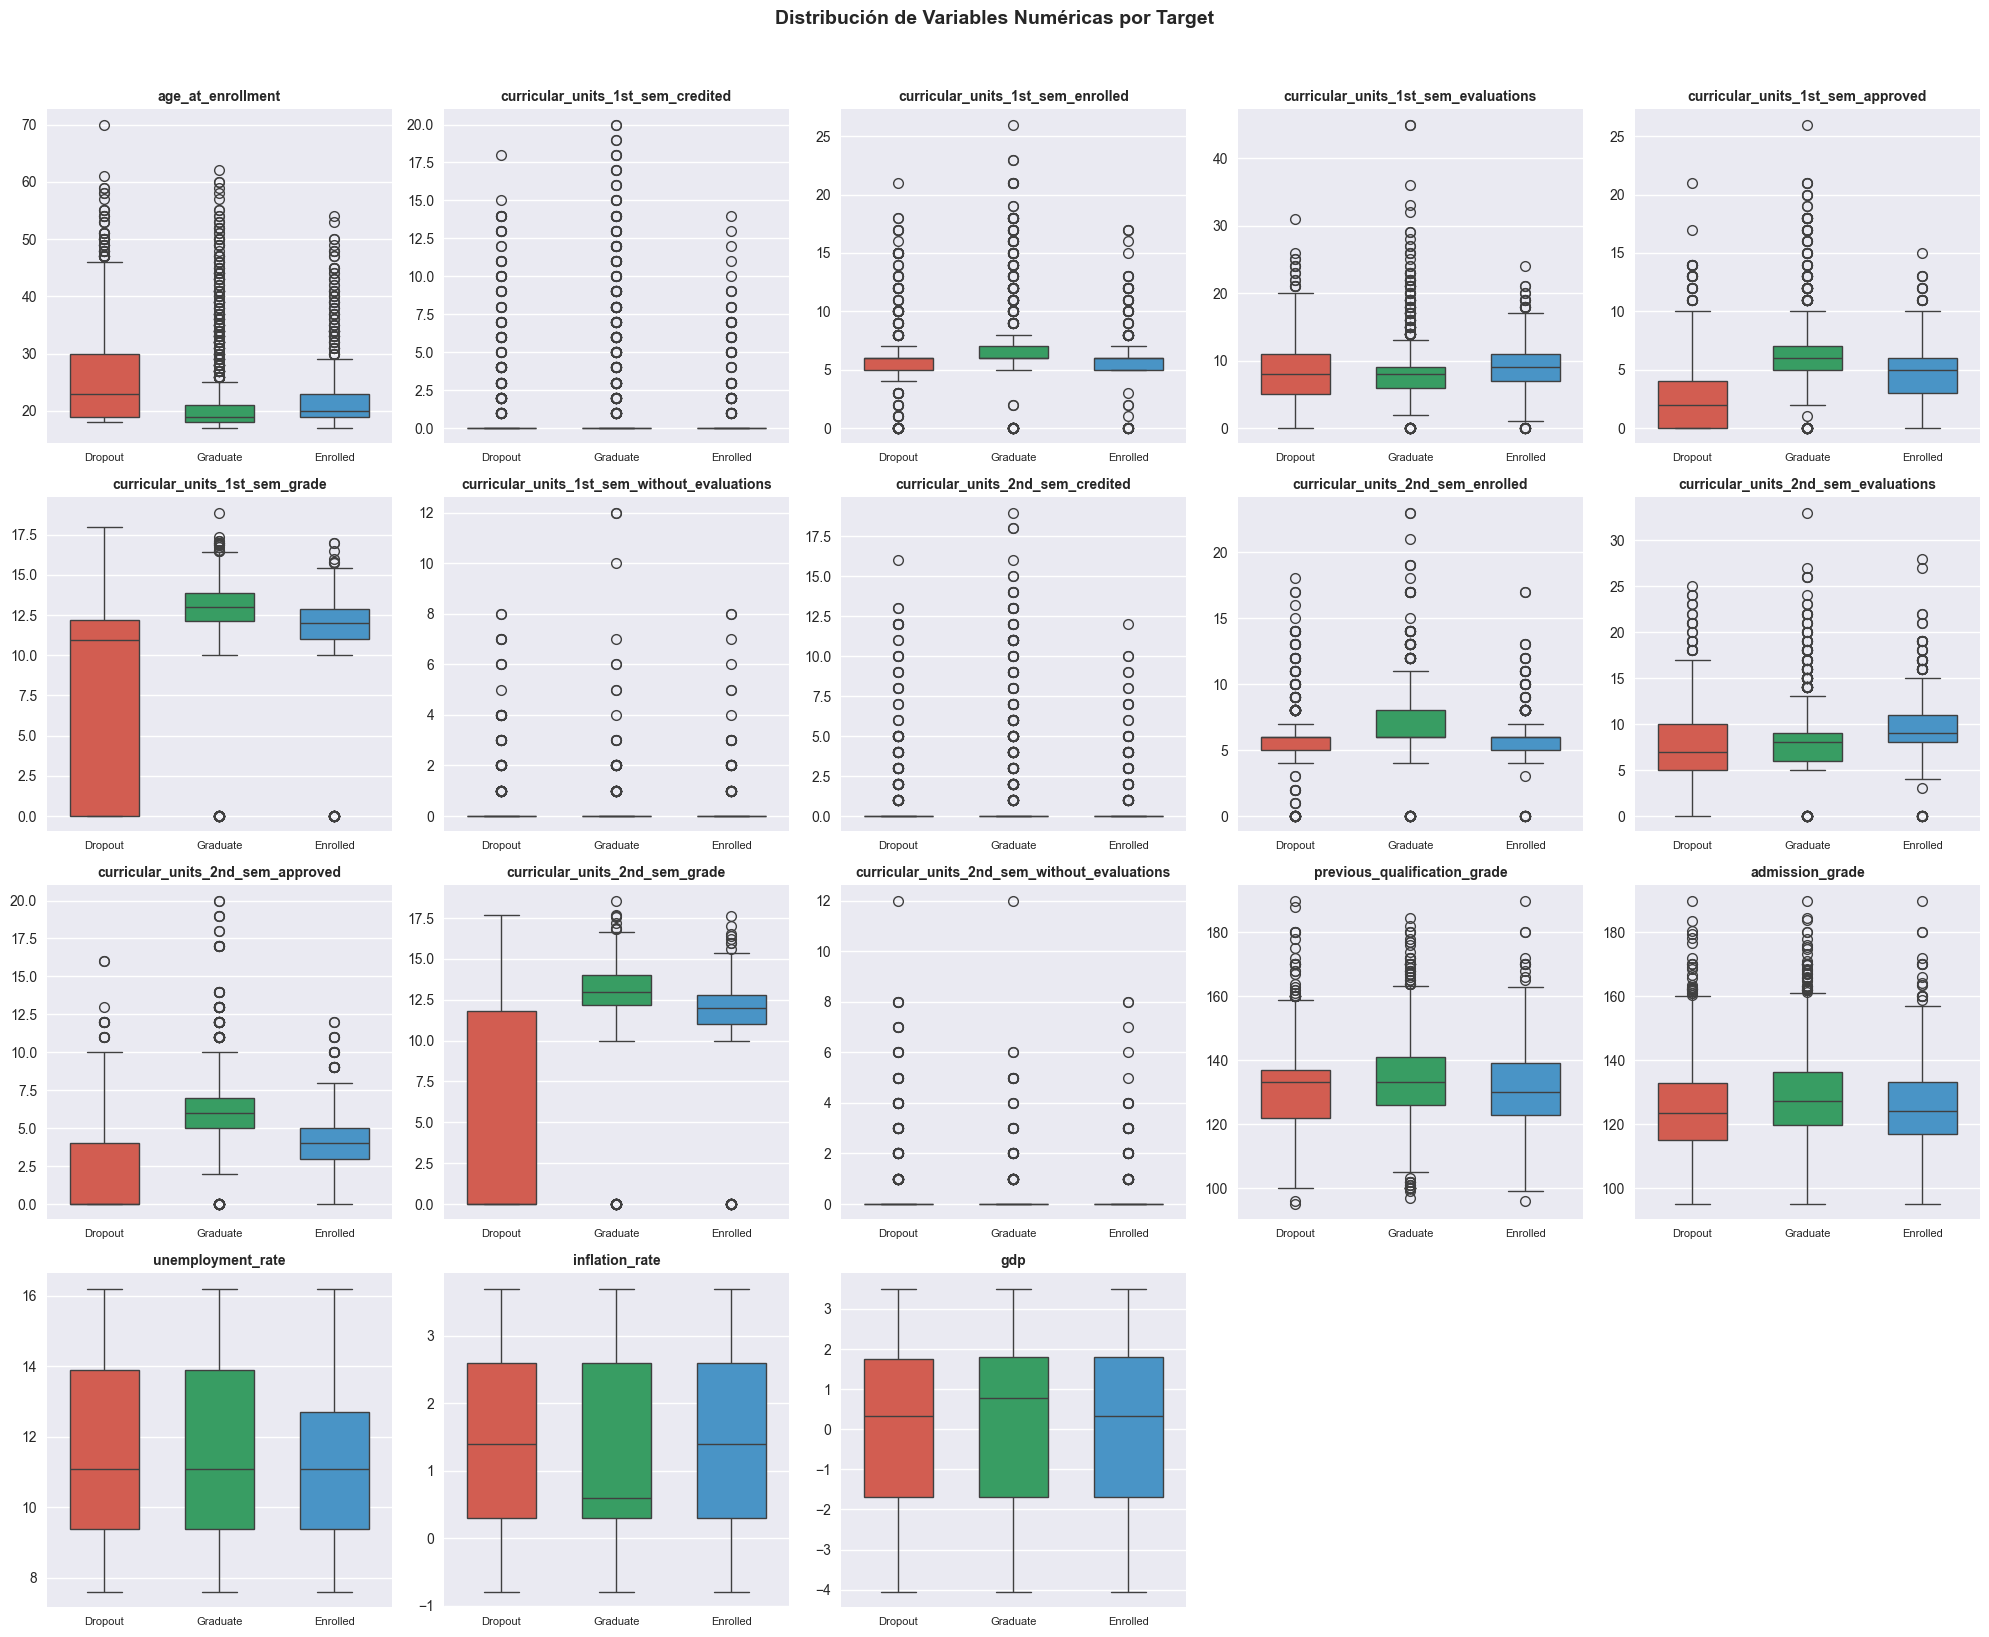

In [174]:
# Boxplots por Target (para ver diferencias entre clases)
n_vars = len(VARS_NUMERICAS)
n_cols = 5
n_rows = (n_vars // n_cols) + (1 if n_vars % n_cols != 0 else 0)

OUTPUT_DIR = "../outputs/figures/EDA/numericas/"
os.makedirs(OUTPUT_DIR, exist_ok=True)
# Nombre archivo 
filename = f"04_boxplot_variables_numericas_by_target.png"
filepath = os.path.join(OUTPUT_DIR, filename)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 16))
axes = axes.flatten()

colors = {'Dropout': '#E74C3C', 'Enrolled': '#3498DB', 'Graduate': '#27AE60'}

for i, col in enumerate(VARS_NUMERICAS):
    ax = axes[i]
    sns.boxplot(x='target', y=col, data=df, ax=ax, 
                hue='target', palette=colors, width=0.6, legend=False)
    ax.set_title(col, fontsize=10, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', labelsize=8)

# Ocultar subplots vacíos
for j in range(len(VARS_NUMERICAS), len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Distribución de Variables Numéricas por Target', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()


#### 3.1.3 Conclusion preliminar EDA Variables numércias

1. Distribuciones. Se debe evaluar potencial transformación de ser necesario de acuerdo al algoritmo.
- Las variables que presentan asimetrias positivas y sesgos extremos son:age_at_enrollment, curricular_units_1st_sem_credited, curricular_units_1st_sem_without_evaluations, curricular_units_2nd_sem_without_evaluations y curricular_units_2nd_sem_credited. Estas distribuciones sesgadas pueden requerir transformaciones (log, box-cox, power transform) dependiendo del algoritmo de modelado seleccionado.
- Las variables curricular_units_1st_sem_grade y curricular_units_2nd_sem_grade presentan una distribución bimodal con peak en 0 (no tiene calificaciones) y 12-14, existiendo dos poblaciones diferenciadas: estudiantes que no rinden evaluaciones y estudiantes activos con rendimiento normal.
- Las variables curricular_units_1st_sem_without_evaluations y curricular_units_2nd_sem_without_evaluations presentan una alta concetración en 0, esto implica que la gran mayoria de los alumnos realiza los exámenes, siendo un signo de estuadiante activo, se debe evaluar transformación de ser necesario.
- Las variables curricular_units_1st_sem_credited y curricular_units_2nd_sem_credited presentan una alta concetración en 0, esto implica que la gran mayoria de los alumnos no convaidan ramos curados previamente, siendo un signo de estuadiante activocursando desde cero el grado.
- Las variables previous_qualification_grade y admission_grade presentan una distribución normal, curricular_units_1st_sem_enrolled y curricular_units_2nd_sem_enrolled presentan una distribución aproximadamente normal. Estas variables son adecuadas para algoritmos que suponen normalidad, sin necesidad de transformaciones adicionales.

2. Outliers.
- Las siguiente variables presentan alta tasas de valores fuera de rango calculado con IQR de 1.5 estas variables presentan maás de un 10%: curricular_units_2nd_sem_grade: 19.8% (877 outliers), curricular_units_1st_sem_grade: 16.4% (726 outliers), curricular_units_1st_sem_credited: 13.0% (577 outliers), curricular_units_2nd_sem_credited: 12.0% (530 outliers) y age_at_enrollment: 10.0% (441 outliers). Estos valores atípicos no necesariamente serán eliminados, ya que representan comportamientos reales del alumnado (rendimientos extremos o inscripciones/creditaciones inusuales). Pueden ser tratados mediante winsorization o técnicas robustas según el modelo, se decidirá en etapa de preprocesamiento.

3. Variables macroeconómicas (unemployment_rate, inflation_rate, gdp).
- Sin outliers (por definición).                                                 
- 9-10 valores únicos.
- Estas variables presentan bajo poder predictivo y probablemente aportarán poca ganancia al modelo.

4. Correlaciones
- ALTA (r > 0.7) 
    - 1st_sem_credited y 2nd_sem_credited:     r = 0.94
    - 1st_sem_enrolled y 2nd_sem_enrolled:     r = 0.94
    - 1st_sem_enrolled y 2nd_sem_credited:     r = 0.75
    - 1st_sem_approved y 2nd_sem_approved:     r = 0.90
    - 1st_sem_approved y 1st_sem_evaluations:  r = 0.77
    - 2nd_sem_approved y 2nd_sem_evaluations:  r = 0.78
    - 1st_sem_grade  2nd_sem_grade:           r = 0.84
    - 1st_sem_grade y 1st_sem_approved:        r = 0.70
    - 2nd_sem_grade y 2nd_sem_approved:        r = 0.76
    - Estas correlaciones indican que el rendimiento académico entre semestres es altamente consistente, y puede requerir reducción de dimensionalidad (PCA o selección de features).

- ALTA (0.5 < r < 0.7) 
    - 1st_sem_enrolled y 1st_sem_evaluations:  r = 0.68
    - 2nd_sem_enrolled y 2nd_sem_evaluations:  r = 0.60
    - 1st_sem_approved y 2nd_sem_enrolled:     r = 0.61
    - previous_qual_grade y admission_grade:   r = 0.58
    - 1st_sem_without_eval y 2nd_sem_without:  r = 0.58

- BAJA (r < 0.3):
    - age_at_enrollment, baja correlación con casi todas
    - Variables macroeconómicas: casi sin correlación   

5. Análisis bivariado
- Las variables curricular_units_1st_sem_approved, curricular_units_2nd_sem_approved, curricular_units_1st_sem_grade y curricular_units_2nd_sem_grade poseen alto poder discriminativoy separan muy bien los grupos en lsa 3 clases.
- La variable age_at_enrollment es un buen predictor también, se conluye que a mayor edad (al momento de la matricula) mayor es el abandono.
- Las variables curricular_units_1st_sem_without_evaluations y curricular_units_2nd_sem_without_evaluations es una señal de abandono.
- La variable previous_qualification_grade y admission_grade tienen poder predictor pero leve ya que se presenta una diferencia leve en las medias de ambas variables.
- Las variables macroeconómicas (unemployment_rate, inflation_rate, gdp) no presentan diferencias visibles.
- El rendimiento en el primer semestre es el principal diferenciador entre clases del target
- La edad (age_at_enrollment) muestra leve relación: estudiantes mayores tienden levemente a mayor abandono.
- Patrones:
    - Estudiantes clasificados "Dropout", presentan menos aprobaciones en ambos semestres (curricular_units_1st_sem_approved y curricular_units_2nd_sem_approved), enores evaluaciones realizadas (curricular_units_1st_sem_evaluations y curricular_units_2nd_sem_evaluations), menores promedios de notas (curricular_units_1st_sem_grade y curricular_units_2nd_sem_grade), menores unidades inscritas (curricular_units_1st_sem_enrolled y curricular_units_2nd_sem_enrolled). 
    - Estudiantes clasificados "Graduate", presentan las mayores medianas en notas (curricular_units_1st_sem_grade y curricular_units_2nd_sem_grade), aprobaciones (curricular_units_1st_sem_approved y curricular_units_2nd_sem_approved) y cantidad de evaluaciones realizadas (curricular_units_2nd_sem_evaluations)
    - Estudiantes clasificados "Enrolled", se ubican en valores intermedios y tiene un comportamieno similar a Graduate pero con menor rendimiento general.

6. Conclusión

- El rendimiento académico temprano (primer semestre) es el principal predictor de la clasificación final del estudiante.
- Existen fuertes patrones de consistencia entre semestres, lo que sugiere que no todos los indicadores son necesarios, dado la multicolinealidad.
- Las variables con asimetría marcada y outliers deben considerarse para transformación, según el algoritmo elegido.
- Las variables macroeconómicas tienen poca influencia en el comportamiento estudiantil, mientras que los indicadores de participación académica y notas sí son altamente relevantes.
- La edad y la ausencia de evaluaciones aparecen como señales secundarias pero útiles para predecir riesgo de abandono.


### 3.2. Análisis variables binarias

#### 3.2.1. Análisis UNIVARIADO

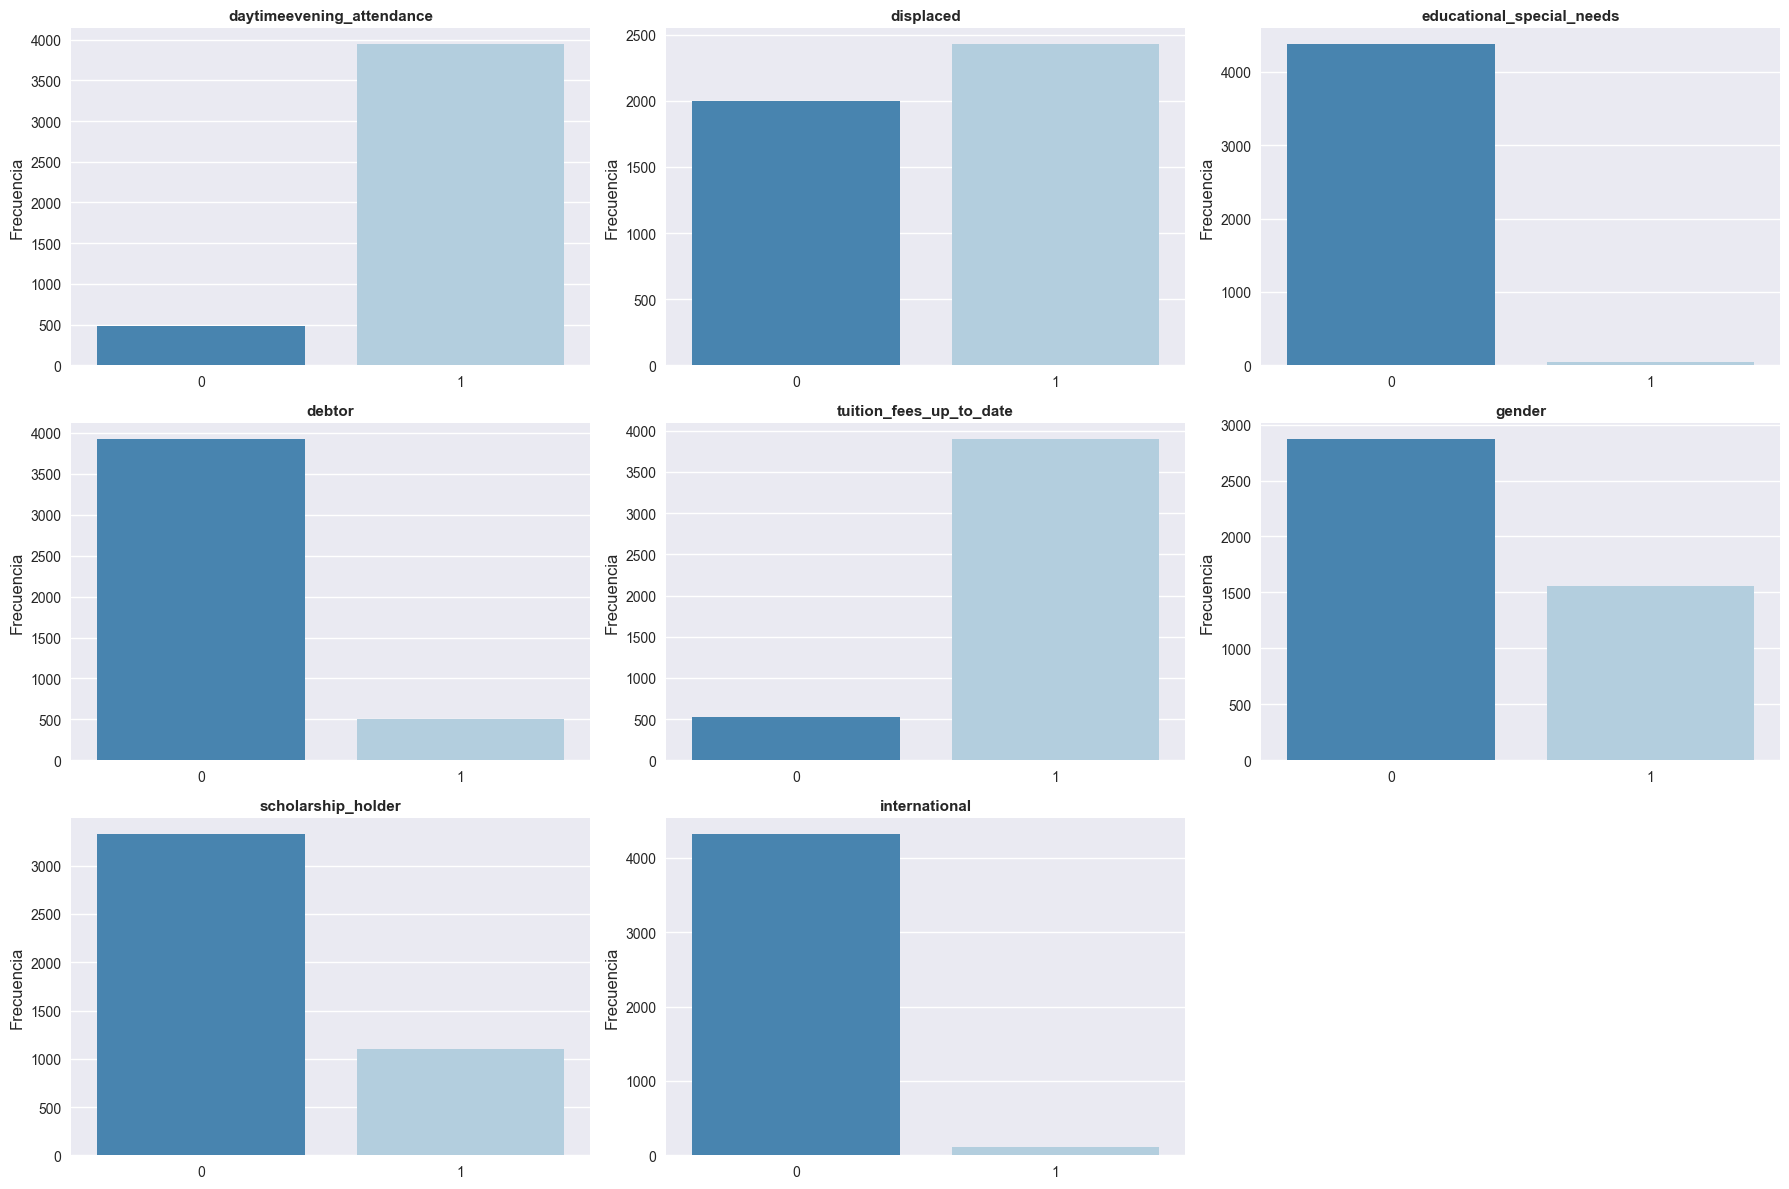

In [175]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
import math
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_univariate(df, cat_vars, n_cols=3):

    OUTPUT_DIR = "../outputs/figures/EDA/numericas/"
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    # Nombre archivo 
    filename = f"05_Grafico_barras_variables_binarias.png"
    filepath = os.path.join(OUTPUT_DIR, filename)
    
    n_vars = len(cat_vars)
    n_rows = math.ceil(n_vars / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(cat_vars):
        ax = axes[i]

        counts = df[col].value_counts().sort_index()

        sns.barplot(x=counts.index.astype(str), y=counts.values, ax=ax, palette="Blues_r")

        ax.set_title(f"{col}", fontsize=11, fontweight='bold')
        ax.set_ylabel("Frecuencia")
        ax.set_xlabel("")
        
    # Ocultar subplots vacíos
    for j in range(n_vars, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()


# EJECUCIÓN
plot_categorical_univariate(df, VARS_BINARIAS, n_cols=3)

#### 3.2.2. Análisis BIVARIADO

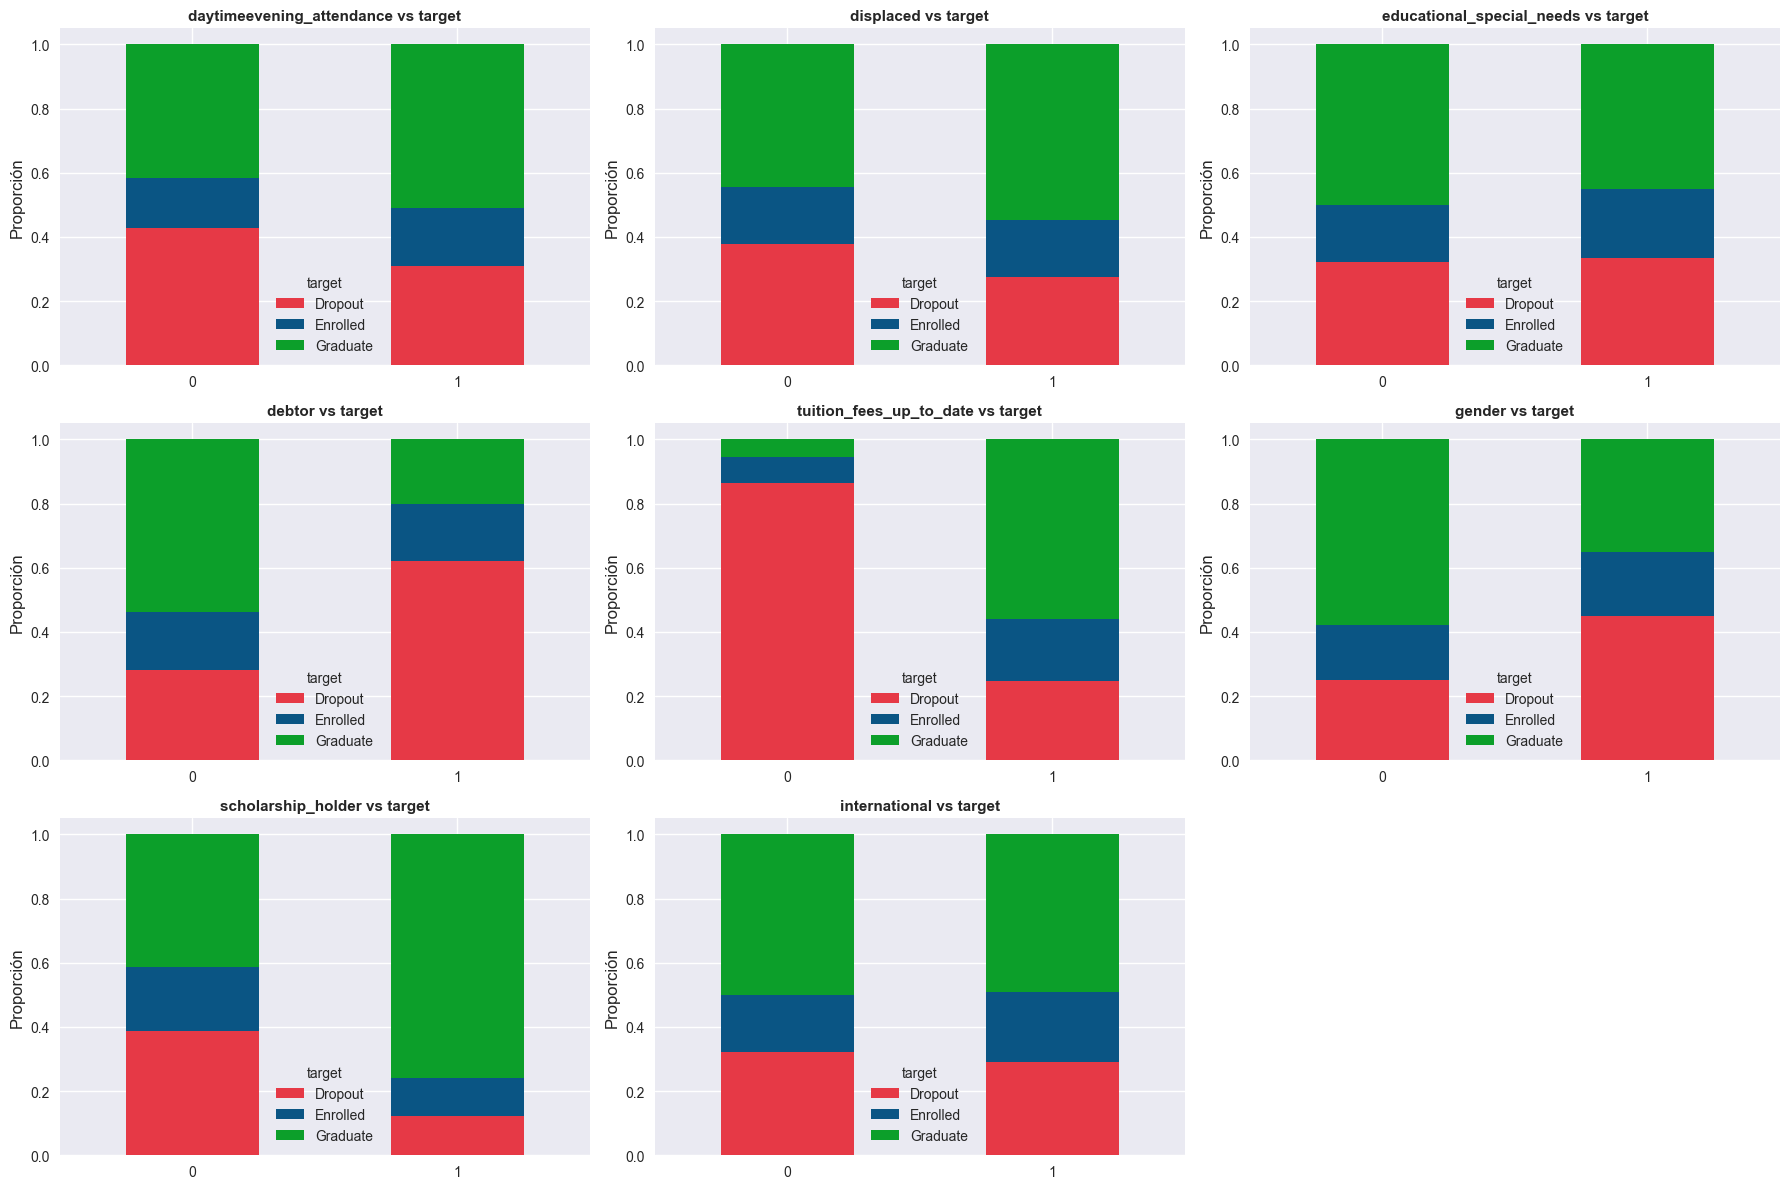

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Paleta consistente para todas las clases
palette = {
    "Dropout": "#e63946",
    "Enrolled": "#0a5584",
    "Graduate": "#0c9f2a"
}

def plot_categorical_bivariate(df, cat_vars, target="target", n_cols=3):

    OUTPUT_DIR = "../outputs/figures/EDA/numericas/"
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    # Nombre archivo 
    filename = f"06_Grafico_variables_binarias_by_target.png"
    filepath = os.path.join(OUTPUT_DIR, filename)

    n_vars = len(cat_vars)
    n_rows = math.ceil(n_vars / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(cat_vars):
        ax = axes[i]

        # Tabla cruzada normalizada
        ctab = pd.crosstab(df[col], df[target], normalize='index')

        # Aplicar colores en el orden correcto de columnas
        ctab.plot(
            kind='bar',
            stacked=True,
            ax=ax,
            color=[palette[c] for c in ctab.columns]  # 👈 colores personalizados
        )

        ax.set_title(f"{col} vs {target}", fontsize=11, fontweight='bold')
        ax.set_ylabel("Proporción")
        ax.set_xlabel("")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

    # Ocultar gráficos sobrantes
    for j in range(n_vars, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()

# EJECUCIÓN
plot_categorical_bivariate(df, VARS_BINARIAS)

#### 3.2.3 Conclusion preliminar EDA variables binarias
1. Variable Daytime/evening attendance (0 = diurno, 1 = nocturno). La mayoría (~90%) pertenece al turno nocturno (1) presentando una menor tasa de deserción. El horario de clases sí tiene relación con el desempeño, pero no es un predictor fuerte del abandono.
2. Variable Displaced (0 = no, 1 = sí). Se visualiza un equilibrio a nivel de categoria desplazado y no desplazado y una leve alza de la proporción de deserción en los no desplazados. No genera diferencias fuertes entre clases de target, en consecuencia, es una variable poco discriminativa.
3. Variable educational_special_needs (0 = no, 1 = sí). Casi todos los estudiantes están en 0 (sin necesidades especiales) y respecto de la relación con el target no hay diferencia al menos visualmente, no aporta información de utilidad. 
4. Variable debtor (0 = sin deudas, 1 = deudor). La mayoría (~90%) no presenta deuda y en los deudores la proporción de deserción es altísima (≈ 65%), es una de las variables más predictivas de abandono.
5. Variable tuition_fees_up_to_date (0 = no al día, 1 = al día). La mayoría (–90%) tiene su matrícula al día presenta, y de quienes no están al día la proporción de deserción es altísima (~90%%).Es, junto con debtor, la variable más predictiva del modelo.
6. Variable gender (0 = mujer, 1 = hombre). En los estudiantes hay más mujeres que hombres y estos último presentan una mayor tasa de deserción.
7. Variable scholarship_holder (0 = no, 1 = sí). La mayoría (~75%) no posee beca de estudios y el grupo que si presenta beca tiene una menor tasa de deserción. en consecuencia, funciona como factor protector contra abandono
8. Variable international (0 = nacional, 1 = internacional). Casi todos son nacionales (0) y la proporción por target es similar. Variable con poca fuerza predictiva.
9. Hallazgos principales:
    - Variables con mayor capacidad de predicción: debtor, tuition_fees_up_to_date y tuition_fees_up_to_date
    - Variables moderamenten informativas: daytimeevening_attendance y scholarship_holder
    - Variables poco relevantes: displaced, educational_special_needs y international

### 3.3. Análisis variables categóricas ordinales y nominales

#### 3.3.1. Análisis UNIVARIADO


 ---- Variable: MARITAL_STATUS ----



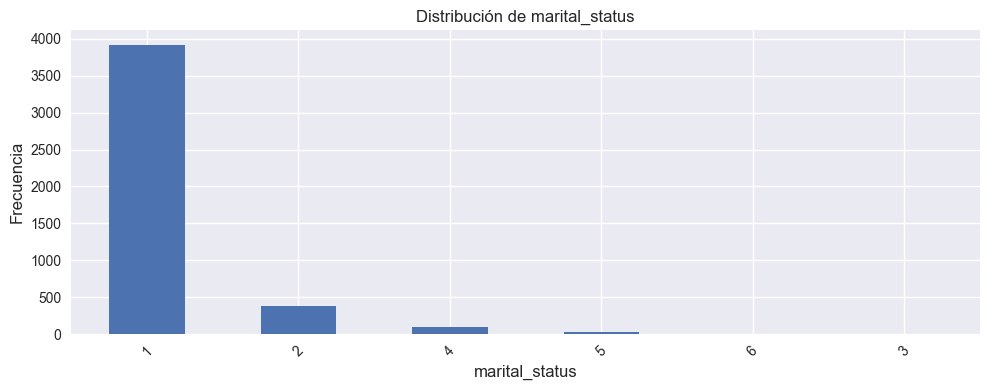

marital_status
1    0.885850
2    0.085669
4    0.020570
5    0.005651
6    0.001356
3    0.000904
Name: proportion, dtype: float64


 ---- Variable: APPLICATION_MODE ----



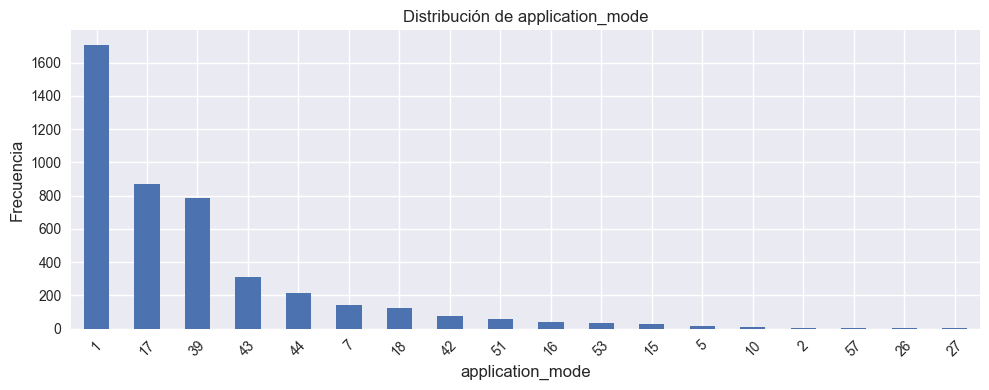

application_mode
1     0.386076
17    0.197107
39    0.177441
43    0.070524
44    0.048146
7     0.031420
18    0.028029
42    0.017405
51    0.013336
16    0.008590
53    0.007911
15    0.006781
5     0.003617
10    0.002260
2     0.000678
57    0.000226
26    0.000226
27    0.000226
Name: proportion, dtype: float64


 ---- Variable: COURSE ----



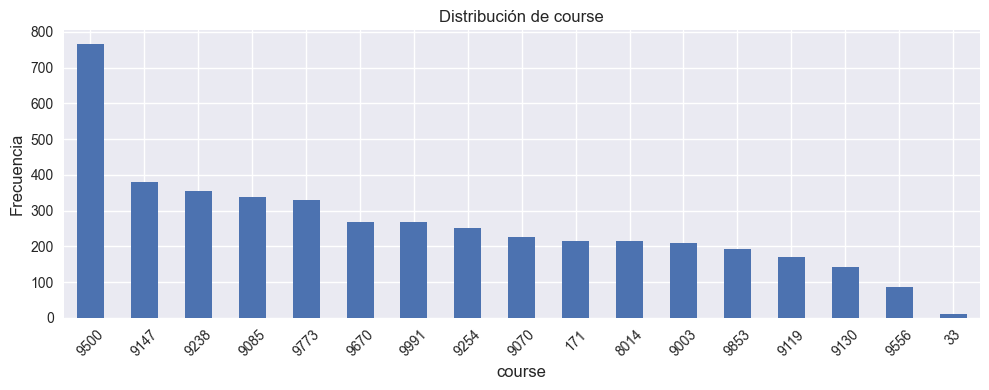

course
9500    0.173146
9147    0.085895
9238    0.080244
9085    0.076175
9773    0.074819
9670    0.060579
9991    0.060579
9254    0.056962
9070    0.051085
171     0.048599
8014    0.048599
9003    0.047468
9853    0.043400
9119    0.038427
9130    0.031872
9556    0.019439
33      0.002712
Name: proportion, dtype: float64


 ---- Variable: PREVIOUS_QUALIFICATION ----



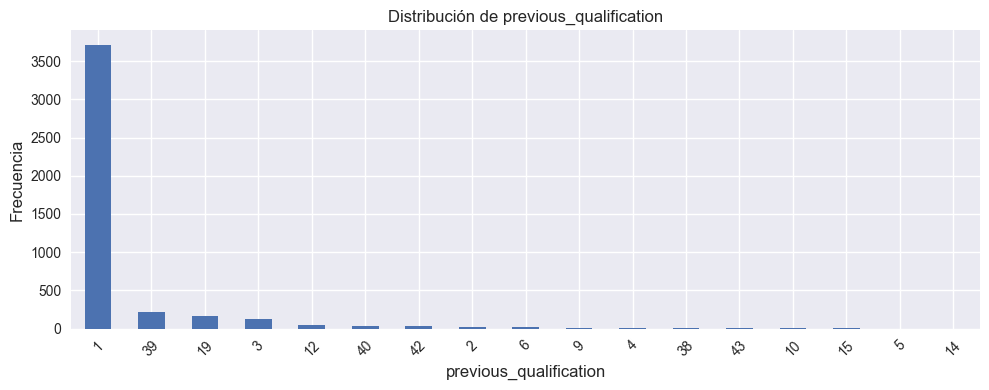

previous_qualification
1     0.840190
39    0.049503
19    0.036618
3     0.028481
12    0.010172
40    0.009042
42    0.008137
2     0.005199
6     0.003617
9     0.002486
4     0.001808
38    0.001582
43    0.001356
10    0.000904
15    0.000452
5     0.000226
14    0.000226
Name: proportion, dtype: float64


 ---- Variable: NACIONALITY ----



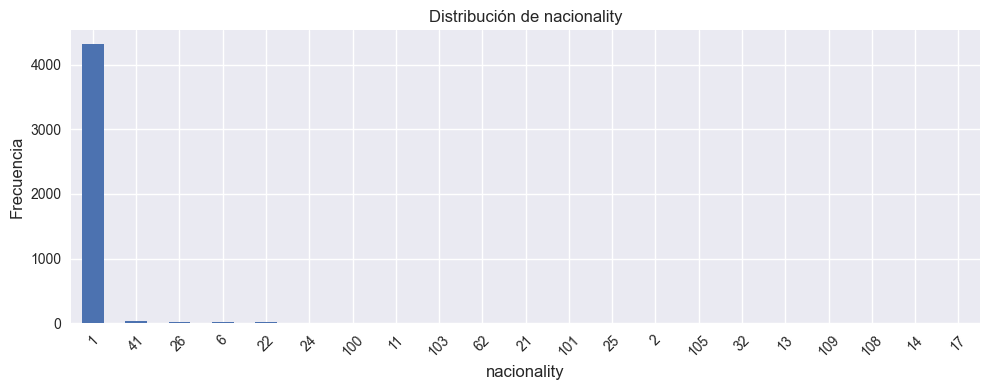

nacionality
1      0.975136
41     0.008590
26     0.003165
6      0.002939
22     0.002939
24     0.001130
100    0.000678
11     0.000678
103    0.000678
62     0.000452
21     0.000452
101    0.000452
25     0.000452
2      0.000452
105    0.000452
32     0.000226
13     0.000226
109    0.000226
108    0.000226
14     0.000226
17     0.000226
Name: proportion, dtype: float64


 ---- Variable: MOTHERS_QUALIFICATION ----



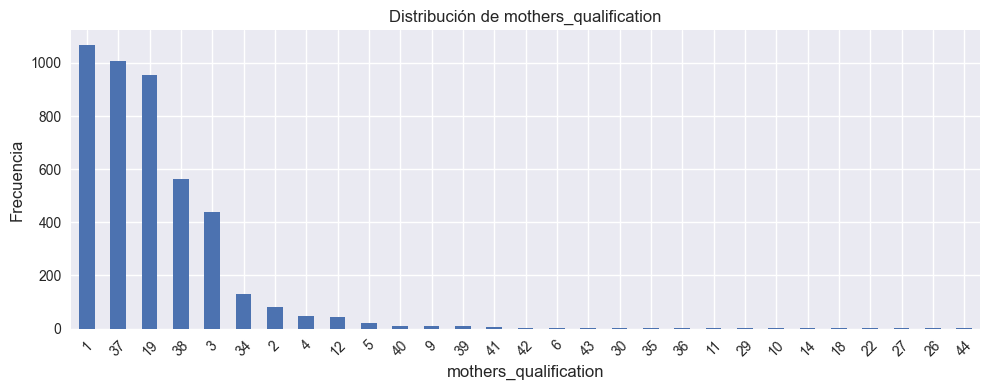

mothers_qualification
1     0.241637
37    0.228074
19    0.215416
38    0.127034
3     0.099005
34    0.029385
2     0.018761
4     0.011076
12    0.009494
5     0.004747
40    0.002034
9     0.001808
39    0.001808
41    0.001356
42    0.000904
6     0.000904
43    0.000904
30    0.000678
35    0.000678
36    0.000678
11    0.000678
29    0.000678
10    0.000678
14    0.000452
18    0.000226
22    0.000226
27    0.000226
26    0.000226
44    0.000226
Name: proportion, dtype: float64


 ---- Variable: FATHERS_QUALIFICATION ----



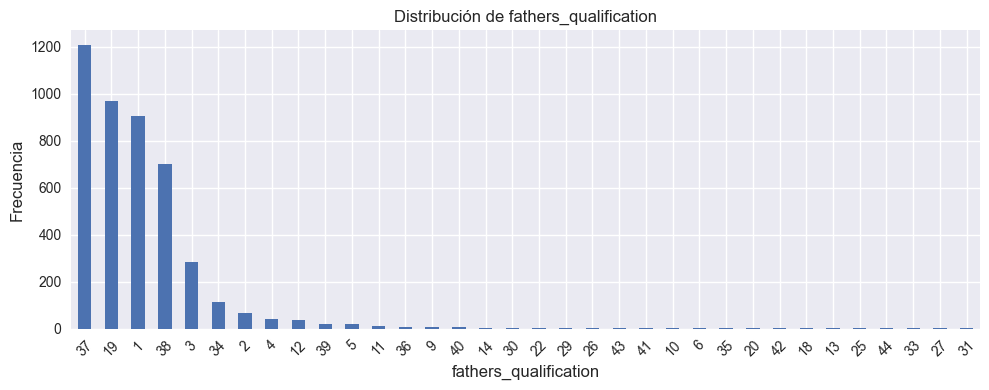

fathers_qualification
37    0.273282
19    0.218807
1     0.204340
38    0.158680
3     0.063743
34    0.025316
2     0.015371
4     0.008816
12    0.008590
39    0.004521
5     0.004069
11    0.002260
36    0.001808
9     0.001130
40    0.001130
14    0.000904
30    0.000904
22    0.000904
29    0.000678
26    0.000452
43    0.000452
41    0.000452
10    0.000452
6     0.000452
35    0.000452
20    0.000226
42    0.000226
18    0.000226
13    0.000226
25    0.000226
44    0.000226
33    0.000226
27    0.000226
31    0.000226
Name: proportion, dtype: float64


 ---- Variable: MOTHERS_OCCUPATION ----



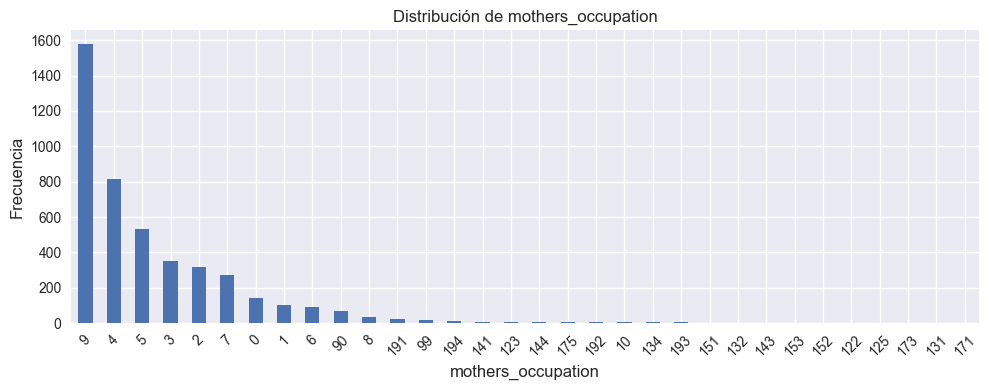

mothers_occupation
9      0.356465
4      0.184675
5      0.119801
3      0.079340
2      0.071881
7      0.061483
0      0.032550
1      0.023056
6      0.020570
90     0.015823
8      0.008137
191    0.005877
99     0.003843
194    0.002486
141    0.001808
123    0.001582
144    0.001356
175    0.001130
192    0.001130
10     0.000904
134    0.000904
193    0.000904
151    0.000678
132    0.000678
143    0.000678
153    0.000452
152    0.000452
122    0.000452
125    0.000226
173    0.000226
131    0.000226
171    0.000226
Name: proportion, dtype: float64


 ---- Variable: FATHERS_OCCUPATION ----



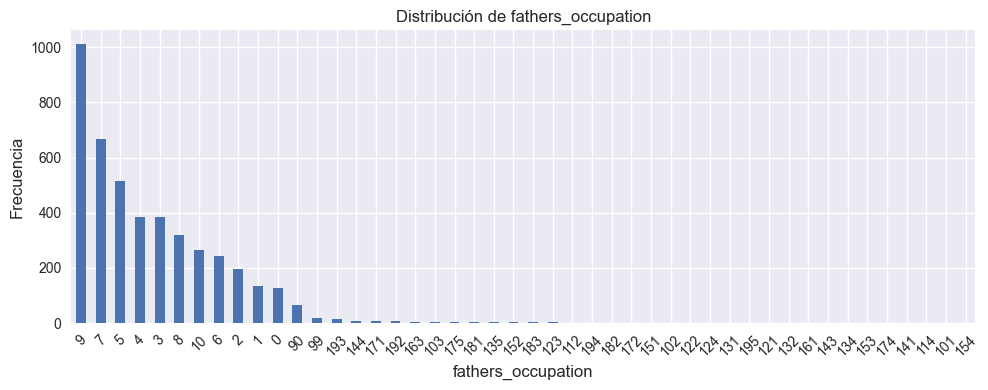

fathers_occupation
9      0.228300
7      0.150542
5      0.116637
4      0.087251
3      0.086799
8      0.071881
10     0.060127
6      0.054702
2      0.044530
1      0.030289
0      0.028933
90     0.014693
99     0.004295
193    0.003391
144    0.001808
171    0.001808
192    0.001356
163    0.001130
103    0.000904
175    0.000904
181    0.000678
135    0.000678
152    0.000678
183    0.000678
123    0.000678
112    0.000452
194    0.000452
182    0.000452
172    0.000452
151    0.000452
102    0.000452
122    0.000452
124    0.000226
131    0.000226
195    0.000226
121    0.000226
132    0.000226
161    0.000226
143    0.000226
134    0.000226
153    0.000226
174    0.000226
141    0.000226
114    0.000226
101    0.000226
154    0.000226
Name: proportion, dtype: float64


 ---- Variable: APPLICATION_ORDER ----



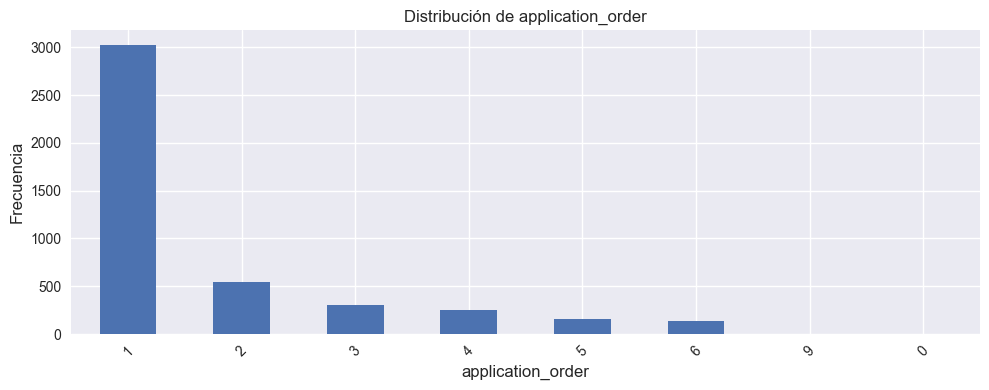

application_order
1    0.683996
2    0.123644
3    0.069846
4    0.056284
5    0.034810
6    0.030967
9    0.000226
0    0.000226
Name: proportion, dtype: float64

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Carpeta donde guardarás los gráficos
OUTPUT_DIR = "../outputs/figures/EDA/categoricas/"
os.makedirs(OUTPUT_DIR, exist_ok=True)

def plot_categorical_univariate(df, column):
    plt.figure(figsize=(10,4))
    
    df[column].value_counts().plot(kind='bar')
    
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Nombre seguro para el archivo (sin espacios)
    filename = f"07_univariate_{column}.png"
    filepath = os.path.join(OUTPUT_DIR, filename)

    # Guardar imagen
    plt.savefig(filepath, dpi=300, bbox_inches='tight')

    plt.show()

    # Mostrar tabla de proporciones en notebook
    display(df[column].value_counts(normalize=True).rename("proportion"))

VARS_CATEGORICAS = VARS_CATEGORICAS_NOMINALES + VARS_CATEGORICAS_ORDINALES

# Ejecutar para todas las variables categóricas
for col in VARS_CATEGORICAS:
    print(f"\n ---- Variable: {col.upper()} ----\n")
    plot_categorical_univariate(df, col)


#### 3.3.2. Análisis BIVARIADO

In [178]:
# Crosstab con Target para variable marital_status
ct = pd.crosstab(df['marital_status'], df['target'], normalize='index') * 100

print("Tasa de deserción por estado civil:")
print(ct['Dropout'].sort_values(ascending=False))


Tasa de deserción por estado civil:
marital_status
6    66.666667
2    47.229551
4    46.153846
5    44.000000
1    30.211789
3    25.000000
Name: Dropout, dtype: float64


In [179]:
# Crosstab con Target para variable application_mode
ct = pd.crosstab(df['application_mode'], df['target'], normalize='index') * 100

print("Tasa de deserción por modo de ingreso:")
print(ct['Dropout'].sort_values(ascending=False))

Tasa de deserción por modo de ingreso:
application_mode
27    100.000000
26    100.000000
2      66.666667
7      61.151079
39     55.414013
42     44.155844
43     36.858974
18     36.290323
51     33.898305
10     30.000000
44     29.577465
17     29.357798
1      20.199063
15     16.666667
16     13.157895
5      12.500000
53     11.428571
57      0.000000
Name: Dropout, dtype: float64


### 3.3.3 Conclusiones Análisis variables categóricas ordinales y nominales

## 4. Distribución de la variable objetivo `Target`
Valores:
- 0 = Dropout
- 1 = Graduate
- 2 = Enrolled

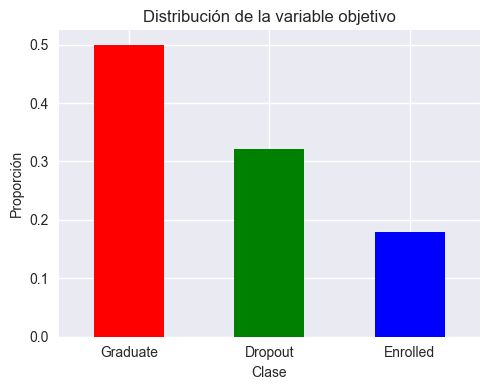

target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [181]:
plt.figure(figsize=(5, 4))   # <-- más pequeño
df['target'].value_counts(normalize=True).plot(
    kind='bar',
    color=['red', 'green', 'blue']
)


OUTPUT_DIR = "../outputs/figures/EDA/target/"
os.makedirs(OUTPUT_DIR, exist_ok=True)
# Nombre archivo 
filename = f"01_distribucion_target.png"
filepath = os.path.join(OUTPUT_DIR, filename)

plt.title("Distribución de la variable objetivo", fontsize=12)
plt.xlabel("Clase", fontsize=10)
plt.ylabel("Proporción", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

df['target'].value_counts()

## 5. Conclusiones del EDA

- El dataset contiene **4.424 registros y 37 variables**, con buena estructura.
- No se observan valores nulos significativos.
- Existe un **marcado desbalance** en la variable objetivo.
- Las variables numéricas muestran patrones esperables, aunque con algunos valores extremos.
- Se identifican **correlaciones importantes** entre variables de rendimiento.
- Las variables categóricas están codificadas numéricamente; requerirán transformaciones.
- El dataset es apropiado para modelos supervisados, pero se necesitarán:
  - Ingeniería de características
  - Normalización/estandarización
  - Manejo del desbalance (SMOTE o class weights)
  - Selección correcta de la variable objetivo (binaria vs multiclass)

El EDA sienta las bases para avanzar hacia la fase de preprocesamiento y creación de pipelines.
